# Fig S9

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind, ks_2samp, ttest_rel, ranksums, mannwhitneyu, wilcoxon, kruskal, median_test

In [3]:
plt.style.use("clean.mplstyle")

In [4]:
machine_precision = np.finfo(np.float64).eps

# Porg plot

In [ ]:
plot_data = pd.read_csv('./data/borg_experiment_data_events.csv', index_col=0)

In [23]:
ttest_ind(plot_data.query('variable == "num_exon_inclusion_skipping" & high_borg_activation')['value'],
          plot_data.query('variable == "num_exon_inclusion_skipping" & ~high_borg_activation')['value'])

Ttest_indResult(statistic=1.3339052752969371, pvalue=0.18223648600171236)

In [24]:
ttest_ind(plot_data.query('variable == "num_exon_inclusion" & high_borg_activation')['value'],
          plot_data.query('variable == "num_exon_inclusion" & ~high_borg_activation')['value'])

Ttest_indResult(statistic=-71.36364921638456, pvalue=0.0)

In [25]:
pvalue = ttest_ind(plot_data.query('variable == "num_exon_skipping" & high_borg_activation')['value'],
          plot_data.query('variable == "num_exon_skipping" & ~high_borg_activation')['value'])
pvalue

Ttest_indResult(statistic=84.4188898947244, pvalue=0.0)

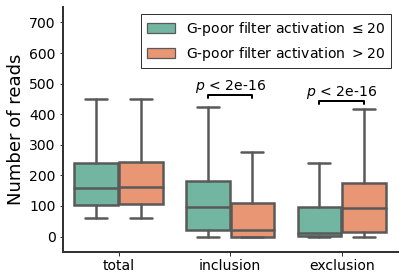

In [26]:
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.boxplot(x="variable", y="value", hue="high_borg_activation",
                    data=plot_data, palette="Set2", showfliers=False, linewidth=2.5, ax=ax)
ax.set_xticks(range(3))
ax.set_xticklabels(['total', 'inclusion', 'exclusion'])
ax.set_xlabel('')

ax.set_ylim(-50, 750)
ax.legend(ncol=1)
ax.set_ylabel('Number of reads')
ax.legend_.set_title('')
for text in ax.legend_.texts:
    if (text.get_text() == 'False'): text.set_text('G-poor filter activation $\leq 20$')
    if (text.get_text() == 'True'): text.set_text('G-poor filter activation $> 20$')
        

props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':10,'shrinkB':10,'linewidth':2}
# f'$p$ < {machine_precision:.2e}'
ax.annotate(f'$p$ < {machine_precision:.0e}', xy=(2, 470), zorder=10, ha='center', va='center')
barwidth = 0.2
arrowheight = 400
ax.annotate('', xy=(2-barwidth,arrowheight), xytext=(2+barwidth, arrowheight), arrowprops=props)


ax.annotate(f'$p$ < {machine_precision:.0e}', xy=(1, 490), zorder=10, ha='center', va='center')
barwidth = 0.2
arrowheight = 420
ax.annotate('', xy=(1-barwidth,arrowheight), xytext=(1+barwidth, arrowheight), arrowprops=props)

        
fig.savefig('./figs/borg_experiment_data_events.svg',
            transparent=True, pad_inches=0.1,
    bbox_inches='tight')

# Structure plot

In [10]:
plot_data = pd.read_csv('data/structure_experiment_data_events.csv.gz', index_col=0)

In [11]:
ttest_ind(plot_data.query('variable == "num_exon_inclusion_skipping" & high_structure_activation')['value'],
          plot_data.query('variable == "num_exon_inclusion_skipping" & ~high_structure_activation')['value'])

Ttest_indResult(statistic=5.521299480228582, pvalue=3.3693581819098276e-08)

In [12]:
ttest_ind(plot_data.query('variable == "total" & high_structure_activation')['value'],
          plot_data.query('variable == "total" & ~high_structure_activation')['value'])

Ttest_indResult(statistic=5.306548401227834, pvalue=1.1184409282374892e-07)

In [13]:
ttest_ind(plot_data.query('variable == "num_exon_skipping" & high_structure_activation')['value'],
          plot_data.query('variable == "num_exon_skipping" & ~high_structure_activation')['value'])

Ttest_indResult(statistic=17.638614970078745, pvalue=1.4130402203447906e-69)

In [14]:
ttest_ind(plot_data.query('variable == "num_exon_inclusion" & high_structure_activation')['value'],
          plot_data.query('variable == "num_exon_inclusion" & ~high_structure_activation')['value'])

Ttest_indResult(statistic=-9.946590707389875, pvalue=2.6438755887760936e-23)

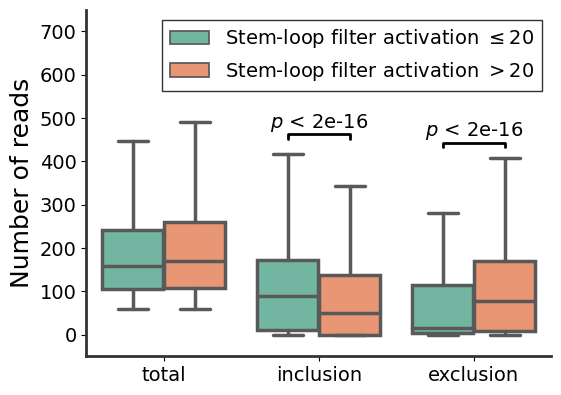

In [25]:
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.boxplot(x="variable", y="value", hue="high_structure_activation",
                    data=plot_data.query("variable != 'total'"), palette="Set2", showfliers=False, linewidth=2.5, ax=ax)
ax.set_xticks(range(3))
ax.set_xticklabels(['total', 'inclusion', 'exclusion'])
ax.set_xlabel('')

ax.set_ylim(-50, 750)
ax.legend(ncol=1)
ax.set_ylabel('Number of reads')
ax.legend_.set_title('')
for text in ax.legend_.texts:
    if (text.get_text() == 'False'): text.set_text('Stem-loop filter activation $\leq 20$')
    if (text.get_text() == 'True'): text.set_text('Stem-loop filter activation $> 20$')
        
props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':10,'shrinkB':10,'linewidth':2}
# f'$p$ < {machine_precision:.2e}'
ax.annotate(f'$p$ < {machine_precision:.0e}', xy=(2, 470), zorder=10, ha='center', va='center')
barwidth = 0.2
arrowheight = 400
ax.annotate('', xy=(2-barwidth,arrowheight), xytext=(2+barwidth, arrowheight), arrowprops=props)

ax.annotate(f'$p$ < {machine_precision:.0e}', xy=(1, 490), zorder=10, ha='center', va='center')
barwidth = 0.2
arrowheight = 420
ax.annotate('', xy=(1-barwidth,arrowheight), xytext=(1+barwidth, arrowheight), arrowprops=props)

        
fig.savefig('./figs/structure_experiment_data_events.svg',
            transparent=True, pad_inches=0.1,
    bbox_inches='tight')